In [36]:
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [37]:
ml_movies=pd.read_csv("Resource/IMDB_cora.csv")
ml_movies

,Unnamed: 0,country,language,world_gross_income
0,79,Russia,Russian,144968.0
1,165,Germany,German,8811.0
2,222,USA,English,772155.0
3,245,USA,English,9183673.0
4,251,USA,English,26916.0
...,...,...,...,...
30851,85847,India,Malayalam,4791.0
30852,85850,"France, Belgium",French,3507171.0
30853,85851,Netherlands,"German, Dutch",7299062.0
30854,85853,Turkey,Turkish,2833.0


In [38]:
ml_movies= ml_movies.drop("Unnamed: 0", axis=1)
ml_movies

,country,language,world_gross_income
0,Russia,Russian,144968.0
1,Germany,German,8811.0
2,USA,English,772155.0
3,USA,English,9183673.0
4,USA,English,26916.0
...,...,...,...
30851,India,Malayalam,4791.0
30852,"France, Belgium",French,3507171.0
30853,Netherlands,"German, Dutch",7299062.0
30854,Turkey,Turkish,2833.0


In [39]:
ml_movies["language"].unique()

array(['Russian', 'German', 'English', ...,
       'Thai, English, Mandarin, Cantonese', 'English, Finnish, Mandarin',
       'German, Dutch'], dtype=object)

In [40]:
English = ["English","english","English,None"]
def clean(response):
    if response.lower().rstrip() in English:
        return "English"
    else:
        return "NonEnglish"
ml_movies["language"] = ml_movies["language"].apply(lambda x: clean(x))
print(ml_movies)

               country    language  world_gross_income
0               Russia  NonEnglish            144968.0
1              Germany  NonEnglish              8811.0
2                  USA     English            772155.0
3                  USA     English           9183673.0
4                  USA     English             26916.0
...                ...         ...                 ...
30851            India  NonEnglish              4791.0
30852  France, Belgium  NonEnglish           3507171.0
30853      Netherlands  NonEnglish           7299062.0
30854           Turkey  NonEnglish              2833.0
30855            Spain  NonEnglish             59794.0

[30856 rows x 3 columns]


In [43]:
X=ml_movies[["country", "language"]]
y=ml_movies["world_gross_income"].values.reshape(-1,1)
print(X,y)

               country    language
0               Russia  NonEnglish
1              Germany  NonEnglish
2                  USA     English
3                  USA     English
4                  USA     English
...                ...         ...
30851            India  NonEnglish
30852  France, Belgium  NonEnglish
30853      Netherlands  NonEnglish
30854           Turkey  NonEnglish
30855            Spain  NonEnglish

[30856 rows x 2 columns] [[1.449680e+05]
 [8.811000e+03]
 [7.721550e+05]
 ...
 [7.299062e+06]
 [2.833000e+03]
 [5.979400e+04]]


In [44]:
# Apply label encoding to categorize the language as being English or not English
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data = X.copy()
label_encoder.fit(data["language"])
label_encoder.classes_

array(['English', 'NonEnglish'], dtype=object)

In [45]:
label_encoder.transform(data.language)

array([1, 1, 0, ..., 1, 1, 1])

In [46]:
from sklearn.model_selection import train_test_split
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,"country_Afghanistan, France","country_Afghanistan, France, Germany, UK","country_Afghanistan, Ireland, Japan, Iran, Netherlands",country_Albania,"country_Albania, Austria, France","country_Algeria, France","country_Algeria, France, Morocco, Belgium","country_Algeria, France, Qatar","country_Algeria, Italy",country_Argentina,...,"country_West Germany, Peru","country_West Germany, USA","country_West Germany, USA, UK",country_Yemen,country_Yugoslavia,"country_Yugoslavia, France, USA","country_Yugoslavia, Hungary, Austria, West Germany","country_Yugoslavia, USA",language_English,language_NonEnglish
23546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [48]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

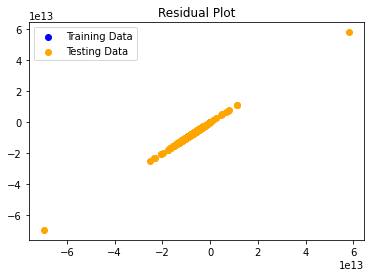

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 7.09030250639768e+24, R2: -6.496520306978067e+24
